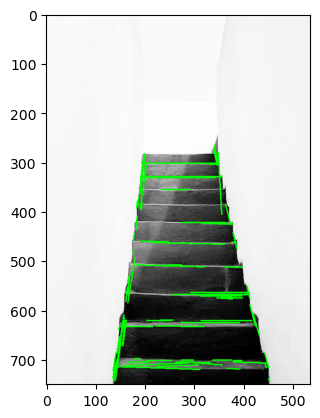

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read image
image = cv2.imread('stairs.png')
 
# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
 
# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=10 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
# Save the result image
plt.imshow(image)

In [ ]:
import numpy as np

# Create a 2D array
x = np.arange(6).reshape(2,3)
print(x)
# Output: array([[0, 1, 2], [3, 4, 5]])

# Use np.argwhere to find indices of elements greater than 1
indices = np.argwhere(x > 1)
print(indices)
# Output: array([[0, 2], [1, 0], [1, 1], [1, 2]])


[[0 1 2]
 [3 4 5]]
[[0 2]
 [1 0]
 [1 1]
 [1 2]]


In [1]:
import requests
from bs4 import BeautifulSoup

def google_search(query):
    # Make a request to Google with the query
    url = "https://www.google.com/search"
    params = {"q": query}
    response = requests.get(url, params=params)

    # Parse the HTML content of the page using Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all  tags in the Search Results section (identified by ID)
    results_divs = soup.find_all('div', class_='g')
    
    # List for storing titles and URLs 
    titles_urls_list = []

    for div in results_divs:
        anchors = div.select("h3 > a")
        
        if(anchors): 
            title= anchors[0].get_text()
            link_url = anchors[0]['href']
            
            # Now you can add anything you want into list. Like following.
            data={title:link_url}
            titles_urls_list.append(data)
        else:
            continue
        
    return titles_urls_list


if __name__ == "__main__":
    query = input("Enter your Google search term: ")
    print(google_search(query))